# NLP - Latent Semantic Indexing, Tf-Idf vectorization, bag-of-words representation with gensim, nltk and scikit-learn

In this notebook I will show the example of Latent Semantic Indexing (LSI) using gensim, scikit-learn and nltk libraries. To begin with, I will scrape the Wikipedia articles I will work on. Then, I will perform tokenization and make a bag-of-words representation, Tf-Idf vectorization and LSI transformation. In the last step, I will visiualize the distances between the documents. 

## Reading Wikipedia articles

The first step is to read the Wikipedia documents using popular web-scraping library BeautifulSoup.

In [1]:
from urllib import request
from bs4 import BeautifulSoup
from urllib.request import urlopen

Here are the documents I will read and save its content.
```python
["Integral", "Riemann_integral", "Riemann-Stieltjes_integral", "Derivative",
    "Limit_of_a_sequence", "Edvard_Munch", "Vincent_van_Gogh", "Jan_Matejko",
    "Lev_Tolstoj", "Franz_Kafka", "J._R._R._Tolkien"]
```

In [2]:
wiki = "http://en.wikipedia.org/wiki/"
titles = ["Integral", "Riemann_integral", "Riemann-Stieltjes_integral", "Derivative",
    "Limit_of_a_sequence", "Edvard_Munch", "Vincent_van_Gogh", "Jan_Matejko",
    "Lev_Tolstoj", "Franz_Kafka", "J._R._R._Tolkien"]

Below is the function for reading the Wikipedia articles. Moreover, I will display first 200 characters of the first article.

In [3]:
def parse(url):        
    x = urlopen(url).read()
    x = BeautifulSoup(x).find("div",id="bodyContent").find_all("p")
    return(x)

articles = [parse(url) for url in [wiki+x for x in titles]]
articles = [" ".join([str(paragraph) for paragraph in article]) for article in articles]

articles[0][:200]

C:\Users\admin\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\admin\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


'<p>In <a href="/wiki/Mathematics" title="Mathematics">mathematics</a>, an <b>integral</b> assigns numbers to functions in a way that can describe displacement, area, volume, and other concepts that ar'

As we can see, the HTML tags were loaded as well. I will therefore perform basic text cleaning using regular expressions.

In [4]:
import re
articles = [re.sub("<.+?>"," ",a) for a in articles]

In [5]:
articles[0]

' In  mathematics , an  integral  assigns numbers to functions in a way that can describe displacement, area, volume, and other concepts that arise by combining  infinitesimal  data. Integration is one of the two main operations of  calculus , with its inverse operation,  differentiation , being the other. Given a  function   f  of a  real   variable   x  and an  interval   [ a ,  b ]  of the  real line , the  definite integral \n   is defined informally as the signed  area  of the region in the  xy -plane that is bounded by the  graph  of  f , the  x -axis and the vertical lines   x  =  a   and   x  =  b  . The area above the  x -axis adds to the total and that below the  x -axis subtracts from the total.\n   The operation of integration, up to an additive constant, is the inverse of the operation of differentiation. For this reason, the term  integral  may also refer to the related notion of the  antiderivative , a function  F  whose derivative is the given function  f . In this case

In [6]:
articles[1]

' In the branch of  mathematics  known as  real analysis , the  Riemann integral , created by  Bernhard Riemann , was the first rigorous definition of the  integral  of a  function  on an  interval .  It was presented to the faculty at the  University of Göttingen  in 1854, but not published in a journal until 1868.  [1]   For many functions and practical applications, the Riemann integral can be evaluated by the  fundamental theorem of calculus  or approximated by  numerical integration .\n   The Riemann integral is unsuitable for many theoretical purposes. Some of the technical deficiencies in Riemann integration can be remedied with the  Riemann–Stieltjes integral , and most disappear with the  Lebesgue integral .\n   Let  f  be a non-negative  real -valued function on the interval  [ a ,  b ] , and let\n   be the region of the plane under the graph of the function  f  and above the interval  [ a ,  b ]  (see the figure on the top right). We are interested in measuring the area of  

# Data cleaning

Now I will need to clean the text. This process will include the following steps:

* tokenization

* removing stopwords

* removing tokens that appear only once

* lowering all the characters

In [8]:
from pprint import pprint
from collections import defaultdict
from nltk.corpus import stopwords
import string


stoplist = set('for a of the and to in'.split() + list(string.punctuation) + stopwords.words('english') )
texts = [[word for word in articles.lower().split() if word not in stoplist] for articles in articles]


frequency = defaultdict(int)
for text in texts:
    for token in text:
        frequency[token] += 1

texts = [[token for token in text if frequency[token] > 1]
         for text in texts]
print(len(texts))
pprint(texts)

11
[['mathematics',
  'integral',
  'assigns',
  'numbers',
  'functions',
  'way',
  'describe',
  'displacement,',
  'area,',
  'volume,',
  'concepts',
  'arise',
  'combining',
  'infinitesimal',
  'integration',
  'one',
  'two',
  'main',
  'operations',
  'calculus',
  'inverse',
  'differentiation',
  'other.',
  'given',
  'function',
  'f',
  'real',
  'variable',
  'x',
  'interval',
  'b',
  'real',
  'line',
  'definite',
  'integral',
  'defined',
  'signed',
  'area',
  'region',
  'bounded',
  'graph',
  'f',
  'x',
  '-axis',
  'vertical',
  'lines',
  'x',
  'x',
  'b',
  'area',
  'x',
  '-axis',
  'adds',
  'total',
  'x',
  '-axis',
  'operation',
  'integration,',
  'inverse',
  'operation',
  'differentiation.',
  'reason,',
  'term',
  'integral',
  'may',
  'also',
  'refer',
  'related',
  'notion',
  'antiderivative',
  'function',
  'f',
  'whose',
  'derivative',
  'given',
  'function',
  'f',
  'case,',
  'called',
  'indefinite',
  'integral',
  'integra

  'f',
  'defined',
  '&amp;',
  'loss',
  '2001',
  'integral',
  'right',
  'ordinary',
  'improper',
  'riemann',
  'integral',
  'f',
  '∗',
  'strictly',
  'decreasing',
  'positive',
  'function,',
  'therefore',
  'well-defined',
  'improper',
  'riemann',
  'suitable',
  'class',
  'functions',
  '(the',
  'measurable',
  'functions',
  'lebesgue',
  'integral.',
  'general',
  'measurable',
  'function',
  'f',
  'lebesgue-integrable',
  'sum',
  'absolute',
  'values',
  'areas',
  'graph',
  'f',
  'x',
  '-axis',
  'case,',
  'integral',
  'is,',
  'case,',
  'difference',
  'area',
  'x',
  '-axis',
  'area',
  'x',
  'although',
  'riemann',
  'lebesgue',
  'integrals',
  'widely',
  'used',
  'definitions',
  'integral,',
  'number',
  'others',
  'exist,',
  'collection',
  'riemann-integrable',
  'functions',
  'closed',
  'interval',
  'b',
  'forms',
  'vector',
  'space',
  'operations',
  'pointwise',
  'addition',
  'multiplication',
  'operation',
  'integration'

  'δ',
  'riemann',
  'sum',
  'within',
  'ε',
  'refinement',
  'partition',
  'also',
  'mesh',
  'less',
  'δ',
  'riemann',
  'sum',
  'refinement',
  'also',
  'within',
  'ε',
  'show',
  'second',
  'definition',
  'implies',
  'first,',
  'easiest',
  'use',
  'darboux',
  'integral',
  'first,',
  'one',
  'shows',
  'second',
  'definition',
  'equivalent',
  'definition',
  'darboux',
  'see',
  'article',
  'darboux',
  'integration.',
  'show',
  'darboux',
  'integrable',
  'function',
  'satisfies',
  'first',
  'definition.',
  'fix',
  'ε',
  'choose',
  'partition',
  '0',
  '...,',
  'lower',
  'upper',
  'darboux',
  'sums',
  'respect',
  'partition',
  'within',
  'ε',
  '/2',
  'value',
  'darboux',
  'integral.',
  'let',
  'r',
  '0',
  'f',
  'zero',
  'function,',
  'clearly',
  'darboux',
  'riemann',
  'integrable',
  'integral',
  'zero.',
  'therefore,',
  'assume',
  'r',
  '&gt;',
  '0',
  '&gt;',
  '1',
  'choose',
  'δ',
  '1',
  'choose',
  'δ',
  '

  'integrand',
  'integrator',
  'g',
  'take',
  'values',
  'banach',
  'space',
  'g',
  'b',
  '→',
  'x',
  'takes',
  'values',
  'banach',
  'space',
  'x',
  'natural',
  'assume',
  'strongly',
  'bounded',
  'variation',
  'meaning',
  'supremum',
  'taken',
  'finite',
  'partitions',
  'interval',
  'b',
  '].',
  'generalization',
  'plays',
  'role',
  'study',
  'via',
  'transform'],
 ['derivative',
  'function',
  'real',
  'variable',
  'measures',
  'change',
  'function',
  'value',
  'respect',
  'change',
  'argument',
  'derivatives',
  'fundamental',
  'tool',
  'calculus',
  'example,',
  'derivative',
  'position',
  'moving',
  'object',
  'respect',
  'time',
  "object's",
  'velocity',
  'measures',
  'quickly',
  'position',
  'object',
  'changes',
  'time',
  'derivative',
  'function',
  'single',
  'variable',
  'chosen',
  'input',
  'value,',
  'exists,',
  'slope',
  'tangent',
  'line',
  'graph',
  'function',
  'point.',
  'tangent',
  'line',
  

  'n',
  '&gt;',
  '1',
  'single',
  'directional',
  'derivative',
  'give',
  'complete',
  'picture',
  'behavior',
  'f',
  'total',
  'derivative',
  'gives',
  'complete',
  'picture',
  'considering',
  'directions',
  'once.',
  'is,',
  'vector',
  'v',
  'starting',
  'linear',
  'approximation',
  'formula',
  'holds:',
  'like',
  'single-variable',
  'derivative,',
  'f',
  '′(',
  'chosen',
  'error',
  'approximation',
  'small',
  'possible.',
  'n',
  'one,',
  'derivative',
  'f',
  '′(',
  'number',
  'expression',
  'f',
  '′(',
  'v',
  'product',
  'two',
  'numbers.',
  'higher',
  'impossible',
  'f',
  '′(',
  'number.',
  'number,',
  'f',
  '′(',
  'v',
  'would',
  'vector',
  'r',
  'n',
  'terms',
  'would',
  'vectors',
  'r',
  'therefore',
  'formula',
  'would',
  'make',
  'sense.',
  'linear',
  'approximation',
  'formula',
  'make',
  'sense,',
  'f',
  '′(',
  'must',
  'function',
  'sends',
  'vectors',
  'r',
  'n',
  'vectors',
  'r',
  'f',


  'symbolic',
  '[34]',
  'together',
  'contemporary',
  'nikolai',
  'munch',
  'considered',
  'woodcut',
  'medium',
  'norway.',
  '[35]',
  'december',
  '1889',
  'father',
  'died,',
  'leaving',
  "munch's",
  'family',
  'returned',
  'home',
  'arranged',
  'large',
  'wealthy',
  'norwegian',
  'collector',
  'wealthy',
  'relatives',
  'failed',
  'assumed',
  'financial',
  'family',
  'on.',
  '[36]',
  "christian's",
  'death',
  'depressed',
  '"i',
  'live',
  'mother,',
  'sister,',
  'grandfather,',
  '[37]',
  "munch's",
  'paintings',
  'following',
  'year',
  'included',
  'scenes',
  'series',
  'bright',
  'experimented',
  'style',
  'georges',
  'seurat',
  '[38]',
  '1892,',
  'munch',
  'formulated',
  'seen',
  'melancholy',
  'color',
  'considered',
  'artist',
  'journalist',
  'christian',
  'krohg',
  'first',
  'symbolist',
  'painting',
  'norwegian',
  'artist,',
  'melancholy',
  'exhibited',
  '1891',
  'autumn',
  'exhibition',
  'oslo.',
  '[3

  'figures',
  'history',
  'western',
  'art',
  'decade',
  'created',
  'including',
  'around',
  'oil',
  'paintings',
  'last',
  'two',
  'years',
  'life.',
  'include',
  'landscapes',
  'still',
  'lifes',
  'portraits',
  'self-portraits',
  'characterised',
  'colours',
  'expressive',
  'brushwork',
  'contributed',
  'foundations',
  'modern',
  'art',
  'however,',
  'commercially',
  'successful,',
  'suicide',
  '37',
  'followed',
  'years',
  'mental',
  'illness',
  'poverty.',
  'born',
  'family,',
  'van',
  'gogh',
  'drew',
  'child',
  'quiet',
  'young',
  'man',
  'worked',
  'art',
  'often',
  'became',
  'depressed',
  'transferred',
  'london.',
  'turned',
  'spent',
  'time',
  'protestant',
  'missionary',
  'southern',
  'belgium.',
  'ill',
  'health',
  'solitude',
  'taking',
  'painting',
  '1881,',
  'moved',
  'back',
  'home',
  'parents.',
  'younger',
  'brother',
  'theo',
  'supported',
  'two',
  'kept',
  'long',
  'correspondence',
  'l

  'andries',
  'bonger',
  "'s",
  'sister',
  '[151]',
  'evening',
  'theo',
  'rushed',
  'station',
  'board',
  'night',
  'train',
  'arles.',
  'arrived',
  'christmas',
  'day',
  'seemed',
  'evening',
  'left',
  'arles',
  'return',
  'trip',
  'paris.',
  '[152]',
  'first',
  'days',
  'van',
  'gogh',
  'repeatedly',
  'unsuccessfully',
  'asked',
  'gauguin,',
  'asked',
  'policeman',
  'attending',
  'case',
  'kind',
  'enough,',
  'man',
  'great',
  'care,',
  'tell',
  'left',
  'paris;',
  'might',
  'prove',
  'him."',
  '[153]',
  'gauguin',
  'fled',
  'arles,',
  'never',
  'see',
  'van',
  'gogh',
  'again.',
  'continued',
  '1890',
  'gauguin',
  'proposed',
  'form',
  'studio',
  'antwerp.',
  'visitors',
  'hospital',
  'included',
  'marie',
  'ginoux',
  '[154]',
  'despite',
  'pessimistic',
  'diagnosis,',
  'van',
  'gogh',
  'recovered',
  'returned',
  'yellow',
  'house',
  '7',
  'january',
  '1889.',
  '[155]',
  'spent',
  'following',
  'mon

  'gogh.',
  '[262]',
  '[note',
  'gauguin',
  'inclined',
  'assistance',
  'van',
  "gogh's",
  'brother',
  'andries',
  'bonger',
  'also',
  'seemed',
  'work.',
  '[262]',
  'one',
  'van',
  "gogh's",
  'earliest',
  'supporters',
  'among',
  'critics,',
  'died',
  'fever',
  '1892',
  'age',
  '[269]',
  '1892',
  'émile',
  'bernard',
  'organised',
  'small',
  'show',
  'van',
  "gogh's",
  'paintings',
  'paris,',
  'julien',
  'tanguy',
  'exhibited',
  'van',
  'gogh',
  'paintings',
  'several',
  'johanna',
  'van',
  'april',
  '1894',
  'gallery',
  'paris',
  'agreed',
  'take',
  '10',
  'paintings',
  'van',
  "gogh's",
  '[269]',
  '1896,',
  'painter',
  'henri',
  'matisse',
  'unknown',
  'art',
  'student,',
  'visited',
  'john',
  'peter',
  'russell',
  '[271]',
  'russell',
  'close',
  'friend',
  'van',
  'gogh;',
  'introduced',
  'matisse',
  'work,',
  'gave',
  'van',
  'gogh',
  'drawing.',
  'influenced',
  'van',
  'gogh,',
  'matisse',
  'aban

  'greatest',
  'living',
  'gustave',
  'flaubert',
  'reading',
  'translation',
  'war',
  'peace',
  '"what',
  'artist',
  'anton',
  'chekhov',
  'often',
  'visited',
  'tolstoy',
  'country',
  'estate,',
  'wrote,',
  'literature',
  'tolstoy,',
  'easy',
  'even',
  'know',
  'achieved',
  'nothing',
  'still',
  'achieving',
  'terrible',
  'might',
  'otherwise',
  'be,',
  'tolstoy',
  'achieves',
  'serves',
  'justify',
  'hopes',
  '19th-century',
  'british',
  'poet',
  'critic',
  'matthew',
  'arnold',
  'opined',
  '"a',
  'novel',
  'tolstoy',
  'work',
  'art',
  'piece',
  '[3]',
  'later',
  'continued',
  'appreciate',
  "tolstoy's",
  'art,',
  'sometimes',
  'also',
  'expressed',
  'criticism.',
  'arthur',
  'wrote',
  '"i',
  'attracted',
  'power',
  'detail,',
  'construction',
  '[44]',
  'declared',
  '"the',
  'greatest',
  '[3]',
  'james',
  'noted',
  '"he',
  'never',
  'never',
  'never',
  'never',
  'never',
  'thomas',
  'mann',
  'wrote',
  

  'dora',
  'diamant',
  'teacher',
  'orthodox',
  'jewish',
  'family.',
  'kafka,',
  'hoping',
  'escape',
  'influence',
  'family',
  'concentrate',
  'writing,',
  'moved',
  'briefly',
  'berlin',
  'lived',
  'diamant.',
  'became',
  'caused',
  'become',
  'interested',
  '[78]',
  'worked',
  'four',
  'stories,',
  'prepared',
  'published',
  'ein',
  'hungerkünstler',
  'hunger',
  'artist',
  ').',
  '[77]',
  'kafka',
  'feared',
  'people',
  'would',
  'find',
  'physically',
  'however,',
  'met',
  'found',
  'quiet',
  'obvious',
  'sense',
  'humour;',
  'also',
  'found',
  'although',
  'austere',
  '[79]',
  '[80]',
  '[81]',
  'brod',
  'compared',
  'kafka',
  'heinrich',
  'von',
  'kleist',
  'noting',
  'writers',
  'ability',
  'describe',
  'situation',
  'realistically',
  'precise',
  'details.',
  '[82]',
  'brod',
  'thought',
  'kafka',
  'one',
  'people',
  'kafka',
  'enjoyed',
  'humour',
  'friends,',
  'also',
  'helped',
  'difficult',
  'si

  'problem',
  'facing',
  'translators',
  'deal',
  "author's",
  'use',
  'ambiguous',
  'words',
  'several',
  'results',
  'difficult',
  '[216]',
  '[217]',
  'one',
  'instance',
  'found',
  'first',
  'sentence',
  '"the',
  'metamorphosis"',
  'english',
  'translators',
  'often',
  'word',
  'ungeziefer',
  'middle',
  'however,',
  'ungeziefer',
  'literally',
  'means',
  'unclean',
  '[218]',
  'german',
  'means',
  'sometimes',
  'used',
  'colloquially',
  'mean',
  'general',
  'term,',
  'unlike',
  'scientific',
  'kafka',
  'intention',
  'protagonist',
  'story,',
  'specific',
  'instead',
  'wanted',
  'convey',
  'transformation.',
  '[140]',
  '[141]',
  'another',
  'example',
  "kafka's",
  'use',
  'german',
  'verkehr',
  'final',
  'sentence',
  '"das',
  'verkehr',
  'means',
  'and,',
  'english,',
  'either',
  'sexual',
  'meaning;',
  'addition,',
  'used',
  'mean',
  'transport',
  'sentence',
  'translated',
  'as:',
  '"at',
  'moment',
  'stre

  'tolkien',
  'completed',
  'lord',
  'rings',
  'close',
  'decade',
  'first',
  'sketches.',
  'tolkien',
  'also',
  'translated',
  'book',
  'bible',
  'published',
  '[86]',
  'tolkiens',
  'four',
  'children:',
  'john',
  'francis',
  'reuel',
  'tolkien',
  'november',
  '1917',
  '–',
  '22',
  'january',
  'michael',
  'hilary',
  'reuel',
  'tolkien',
  'october',
  '1920',
  '–',
  '27',
  'february',
  'christopher',
  'john',
  'reuel',
  'tolkien',
  '(born',
  '21',
  'november',
  '1924)',
  'mary',
  'reuel',
  'tolkien',
  '(born',
  '18',
  'june',
  'tolkien',
  'children',
  'sent',
  'illustrated',
  'letters',
  'father',
  'christmas',
  'young.',
  'year',
  'characters',
  'north',
  'polar',
  "christmas's",
  'man',
  '(his',
  '(his',
  'various',
  'other,',
  'characters.',
  'major',
  'characters',
  'would',
  'tales',
  'father',
  "christmas's",
  'battles',
  'rode',
  'various',
  'committed',
  'north',
  'polar',
  '[87]',
  'life',
  'deat

  'germanic',
  'philology,',
  'gothic',
  'old',
  'medieval',
  'welsh',
  '1925,',
  'aged',
  'tolkien',
  'applied',
  'rawlinson',
  'bosworth',
  'anglo-saxon',
  'pembroke',
  'college,',
  'oxford',
  'students',
  'germanic',
  'philology',
  'leeds',
  'even',
  'formed',
  'club',
  '".',
  '[180]',
  'also',
  'knowledge',
  '[181]',
  'tolkien',
  'attracted',
  'linguistic',
  'lecture',
  'english',
  'welsh',
  'crucial',
  'understanding',
  'race',
  'language,',
  'entertained',
  'notions',
  'linguistic',
  'termed',
  '"native',
  'opposed',
  'person',
  'first',
  '[182]',
  'considered',
  'west',
  'middle',
  'english',
  '"native',
  'and,',
  'wrote',
  'w.',
  'h.',
  'auden',
  '1955,',
  '"i',
  'blood',
  '(and',
  'took',
  'early',
  'middle',
  'english',
  'known',
  'tongue',
  'soon',
  'set',
  'eyes',
  '[183]',
  'parallel',
  "tolkien's",
  'work',
  'sometimes',
  'work,',
  'effect',
  'academic',
  'output',
  'remained',
  'rather',
  'a

## Bag-of-words representation

Now I will make a bag-of-words representation and will save the result into **'/tmp/wiki_deerwester.dict'**, as this file will be also used later.

In [9]:
from gensim import corpora, models, similarities, matutils

dictionary = corpora.Dictionary(texts)
dictionary.save('/tmp/wiki_deerwester.dict')
print(dictionary)

Dictionary(4947 unique tokens: ['".', '"d"', '"one', '"to', '&amp;']...)


In [10]:
print(dictionary.token2id)

{'".': 0, '"d"': 1, '"one': 2, '"to': 3, '&amp;': 4, '&gt;': 5, '&lt;': 6, '(0)': 7, '(1)': 8, '(a': 9, '(as': 10, '(e.g.,': 11, '(for': 12, '(i.e.': 13, '(i.e.,': 14, '(in': 15, '(indicated': 16, '(of': 17, '(respectively,': 18, '(see': 19, '(signed)': 20, '(the': 21, '(to': 22, '(which': 23, '(written': 24, '),': 25, ').': 26, ');': 27, ')}': 28, '+1': 29, '-axis': 30, '-finite': 31, '-value': 32, '-valued': 33, '0': 34, '0,': 35, '1': 36, '1,': 37, '1.': 38, '1/2': 39, '10': 40, '16': 41, '17': 42, '17th': 43, '18': 44, '1822': 45, '1899': 46, '1988': 47, '2': 48, '2001': 49, '2002': 50, '2004': 51, '2008': 52, '3': 53, '3.76': 54, '3rd': 55, '4': 56, '5': 57, '5th': 58, '9': 59, '[1]': 60, '[2]': 61, '[3]': 62, '[4]': 63, '\\int': 64, '\\wedge': 65, 'ability': 66, 'able': 67, 'absolute': 68, 'academy': 69, 'according': 70, 'accuracy': 71, 'accuracy.': 72, 'accurate': 73, 'achieve': 74, 'achieved': 75, 'acquired': 76, 'active': 77, 'actually': 78, 'adapted': 79, 'adaptive': 80, 'add

In the dictionary created above, I will try to find a representation of a "Human computer interaction" document.

In [11]:
new_doc = "Human computer interaction"
new_vec = dictionary.doc2bow(new_doc.lower().split())
print(new_vec) 

[(237, 1), (2253, 1)]


I will also transform the corpus into vectorized form and save it into **'/tmp/wiki_deerwester.mm'**

In [12]:
corpus = [dictionary.doc2bow(text) for text in texts]
print(corpus)

[[(0, 2), (1, 2), (2, 1), (3, 1), (4, 4), (5, 3), (6, 1), (7, 2), (8, 1), (9, 1), (10, 2), (11, 1), (12, 1), (13, 1), (14, 1), (15, 2), (16, 3), (17, 1), (18, 2), (19, 2), (20, 1), (21, 2), (22, 3), (23, 1), (24, 1), (25, 4), (26, 3), (27, 1), (28, 1), (29, 2), (30, 5), (31, 4), (32, 2), (33, 1), (34, 10), (35, 1), (36, 18), (37, 2), (38, 3), (39, 1), (40, 1), (41, 2), (42, 1), (43, 4), (44, 1), (45, 2), (46, 1), (47, 1), (48, 17), (49, 1), (50, 1), (51, 1), (52, 1), (53, 3), (54, 3), (55, 2), (56, 3), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 2), (65, 2), (66, 1), (67, 2), (68, 1), (69, 1), (70, 1), (71, 2), (72, 2), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 2), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 2), (87, 1), (88, 3), (89, 5), (90, 1), (91, 5), (92, 1), (93, 3), (94, 12), (95, 3), (96, 2), (97, 2), (98, 1), (99, 1), (100, 4), (101, 1), (102, 1), (103, 2), (104, 2), (105, 5), (106, 13), (107, 2), (108, 7), (109, 2), (11

In [13]:
corpora.MmCorpus.serialize('/tmp/wiki_deerwester.mm', corpus)

I will now read saved files and transform the corpus into matrix.

In [15]:
scipy_csc_matrix = matutils.corpus2csc(corpus)
print(scipy_csc_matrix.todense())

[[2. 0. 0. ... 0. 1. 2.]
 [2. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 2.]
 [0. 0. 0. ... 0. 0. 3.]
 [0. 0. 0. ... 0. 0. 2.]]


## Tf-Idf transformation
Now I will perform a Tf-Idf transformation. The first step is to initializa a model.

In [16]:
tfidf = models.TfidfModel(corpus)

Below I perform the transformation of the whole corpus.

In [17]:
corpus_tfidf = tfidf[corpus]
for doc in corpus_tfidf:
    print(doc)

[(0, 0.006098546326899046), (1, 0.01854719880027107), (2, 0.006592928000193687), (3, 0.003049273163449523), (4, 0.012197092653798092), (5, 0.009147819490348569), (6, 0.00391225660025184), (7, 0.013185856000387373), (8, 0.006592928000193687), (9, 0.005024835754472021), (10, 0.013185856000387373), (11, 0.006592928000193687), (12, 0.002344164354530174), (13, 0.005024835754472021), (14, 0.005024835754472021), (15, 0.00782451320050368), (16, 0.027820798200406605), (17, 0.006592928000193687), (18, 0.01854719880027107), (19, 0.00782451320050368), (20, 0.006592928000193687), (21, 0.0007372035270153507), (22, 0.01977878400058106), (23, 0.003049273163449523), (24, 0.006592928000193687), (25, 0.0014744070540307014), (27, 0.005024835754472021), (28, 0.006592928000193687), (29, 0.013185856000387373), (30, 0.03296464000096843), (31, 0.03709439760054214), (32, 0.01854719880027107), (33, 0.005024835754472021), (34, 0.030492731634495226), (35, 0.006592928000193687), (36, 0.013969297958553163), (37, 0.0

In [18]:
scipy_csc_matrix = matutils.corpus2csc(corpus_tfidf)
print(scipy_csc_matrix.todense())

[[0.00609855 0.         0.         ... 0.         0.00197662 0.00279679]
 [0.0185472  0.         0.         ... 0.         0.         0.        ]
 [0.00659293 0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.00850572]
 [0.         0.         0.         ... 0.         0.         0.01275858]
 [0.         0.         0.         ... 0.         0.         0.00850572]]


## LSI transformation
The next step is to perform a LSI transformation of 2 topics. I will also display 2 most important subjects.

In [19]:
lsi = models.LsiModel(corpus_tfidf, id2word=dictionary, num_topics=2)
corpus_lsi = lsi[corpus_tfidf]

lsi.print_topics(2)

[(0,
  '0.459*"integral" + 0.304*"x" + 0.299*"f" + 0.257*"{\\displaystyle" + 0.252*"riemann" + 0.196*"function" + 0.177*"g" + 0.153*"ε" + 0.144*"n" + 0.125*"riemann–stieltjes"'),
 (1,
  '0.305*"tolkien" + 0.297*"munch" + 0.292*"van" + 0.265*"tolstoy" + 0.262*"gogh" + 0.259*"kafka" + 0.222*"matejko" + 0.178*"kraków" + 0.169*"polish" + 0.156*"kafka\'s"')]

In [20]:
lsi.print_topics(num_topics=2, num_words=4)

[(0, '0.459*"integral" + 0.304*"x" + 0.299*"f" + 0.257*"{\\displaystyle"'),
 (1, '0.305*"tolkien" + 0.297*"munch" + 0.292*"van" + 0.265*"tolstoy"')]

I will sort the articles by the relevancy to the particular topic. 

In [21]:
numpy_corpus = matutils.corpus2dense(corpus_lsi, num_terms=2)
print(numpy_corpus)
topic_ind = 0
docs = np.argsort( np.abs(numpy_corpus[0,:]) )[::-1]
for x in docs[:5]:
    print(corpus[x])


[[ 8.0349773e-01  7.3786843e-01  7.1824533e-01  5.5679858e-01
   4.6865535e-01  1.7874781e-02  1.1602417e-02  8.6810254e-03
   1.1368162e-02  1.2183700e-02  1.5632132e-02]
 [-3.2612586e-03 -2.0628020e-02 -2.9330596e-02  1.1129894e-02
  -1.3452549e-04  4.3799028e-01  5.3552091e-01  4.6442941e-01
   3.4904104e-01  3.7418845e-01  3.9487141e-01]]
[(0, 2), (1, 2), (2, 1), (3, 1), (4, 4), (5, 3), (6, 1), (7, 2), (8, 1), (9, 1), (10, 2), (11, 1), (12, 1), (13, 1), (14, 1), (15, 2), (16, 3), (17, 1), (18, 2), (19, 2), (20, 1), (21, 2), (22, 3), (23, 1), (24, 1), (25, 4), (26, 3), (27, 1), (28, 1), (29, 2), (30, 5), (31, 4), (32, 2), (33, 1), (34, 10), (35, 1), (36, 18), (37, 2), (38, 3), (39, 1), (40, 1), (41, 2), (42, 1), (43, 4), (44, 1), (45, 2), (46, 1), (47, 1), (48, 17), (49, 1), (50, 1), (51, 1), (52, 1), (53, 3), (54, 3), (55, 2), (56, 3), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 2), (65, 2), (66, 1), (67, 2), (68, 1), (69, 1), (70, 1), (71, 2), (72, 2), (73,

In [22]:
for x in docs[:5]:
    print(titles[x])

Integral
Riemann_integral
Riemann-Stieltjes_integral
Derivative
Limit_of_a_sequence


In [23]:
numpy_corpus = matutils.corpus2dense(corpus_lsi, num_terms=2)
print(numpy_corpus)
topic_ind = 0
docs = np.argsort( np.abs(numpy_corpus[1,:]) )[::-1]
for x in docs[:5]:
    print(corpus[x])


[[ 8.0349773e-01  7.3786843e-01  7.1824533e-01  5.5679858e-01
   4.6865535e-01  1.7874781e-02  1.1602417e-02  8.6810254e-03
   1.1368162e-02  1.2183700e-02  1.5632132e-02]
 [-3.2612586e-03 -2.0628020e-02 -2.9330596e-02  1.1129894e-02
  -1.3452549e-04  4.3799028e-01  5.3552091e-01  4.6442941e-01
   3.4904104e-01  3.7418845e-01  3.9487141e-01]]
[(0, 2), (2, 1), (3, 1), (4, 1), (21, 1), (23, 1), (25, 5), (26, 1), (27, 1), (36, 2), (40, 3), (42, 2), (44, 1), (48, 2), (56, 1), (66, 1), (67, 4), (69, 6), (70, 7), (76, 3), (82, 1), (83, 1), (90, 1), (92, 2), (93, 1), (94, 12), (96, 3), (103, 1), (104, 3), (109, 2), (114, 2), (129, 2), (134, 1), (135, 9), (146, 1), (152, 3), (154, 20), (156, 12), (158, 1), (160, 2), (163, 6), (166, 1), (173, 1), (184, 2), (186, 5), (187, 1), (190, 2), (191, 1), (198, 1), (207, 1), (209, 1), (211, 1), (212, 1), (213, 1), (217, 1), (218, 7), (223, 2), (228, 1), (229, 10), (232, 1), (242, 1), (250, 2), (253, 1), (254, 1), (259, 8), (260, 1), (261, 6), (263, 1), (

In [24]:
for x in docs[:5]:
    print(titles[x])

Vincent_van_Gogh
Jan_Matejko
Edvard_Munch
J._R._R._Tolkien
Franz_Kafka


## Analysing results
Below is the visual representation of the topics.

In [25]:
docs_red = numpy_corpus.T
docs_red

array([[ 8.0349773e-01, -3.2612586e-03],
       [ 7.3786843e-01, -2.0628020e-02],
       [ 7.1824533e-01, -2.9330596e-02],
       [ 5.5679858e-01,  1.1129894e-02],
       [ 4.6865535e-01, -1.3452549e-04],
       [ 1.7874781e-02,  4.3799028e-01],
       [ 1.1602417e-02,  5.3552091e-01],
       [ 8.6810254e-03,  4.6442941e-01],
       [ 1.1368162e-02,  3.4904104e-01],
       [ 1.2183700e-02,  3.7418845e-01],
       [ 1.5632132e-02,  3.9487141e-01]], dtype=float32)

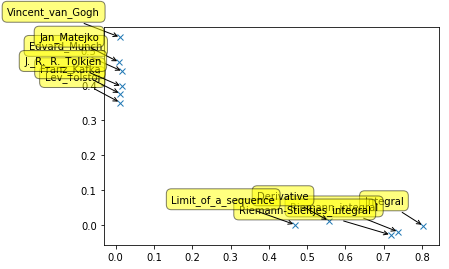

In [26]:
import matplotlib.pyplot as plt


plt.plot(docs_red[:, 0], docs_red[:, 1], 'x')
labels = titles
for label, x, y in zip(labels, docs_red[:, 0], docs_red[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
plt.show()

I will also mark two subjects, <i>Machine Learning</i> and <i>Mathematics is art</i>.

In [27]:
query = ["Machine Learning", "Mathematics is art"]

new_vec = [dictionary.doc2bow(w.lower().split()) for w in query] 
print(new_vec) 
new_vec_tf = tfidf[new_vec]

new_vec_tf_matrix = matutils.corpus2csc(new_vec_tf)
print(new_vec_tf_matrix.todense())


new_vec_tf_lsi = lsi[new_vec_tf] 

new_vec_tf_lsi_matrix = matutils.corpus2dense(new_vec_tf_lsi, num_terms=2)
print(new_vec_tf_lsi_matrix)

[[(2329, 1), (4449, 1)], [(638, 1), (1936, 1)]]
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [0.         0.        ]
 [0.         0.        ]
 [0.79533561 0.        ]]
[[8.5274289e-05 1.0294119e-02]
 [4.8683309e-03 1.8187221e-02]]


In [28]:
query_red = new_vec_tf_lsi_matrix.T
query_red

array([[8.5274289e-05, 4.8683309e-03],
       [1.0294119e-02, 1.8187221e-02]], dtype=float32)

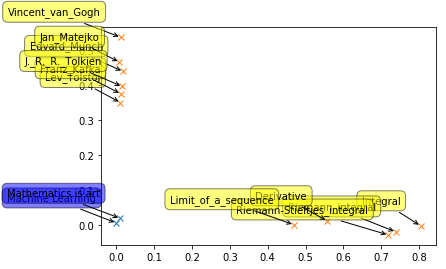

In [29]:
plt.plot(query_red[:, 0], query_red[:, 1], 'x')
plt.plot(docs_red[:, 0], docs_red[:, 1], 'x')
labels = titles
for label, x, y in zip(labels, docs_red[:, 0], docs_red[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
labels = query
for label, x, y in zip(labels, query_red[:, 0], query_red[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='blue', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
plt.show()